<a href="https://colab.research.google.com/github/thaugenes/4850/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: Tor Haugenes (th455) and Jose Osorio (jao82)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [6]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')

# plot_clock_path takes as an argument the uniform random variable, NOT the x sequence!
def plot_clock_path(m,u,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(u[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')

    # Plot the path of the LCG sequence
    for i in range(len(u)-1):
        theta_start = 2.0*np.pi*(u[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(u[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y,
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)

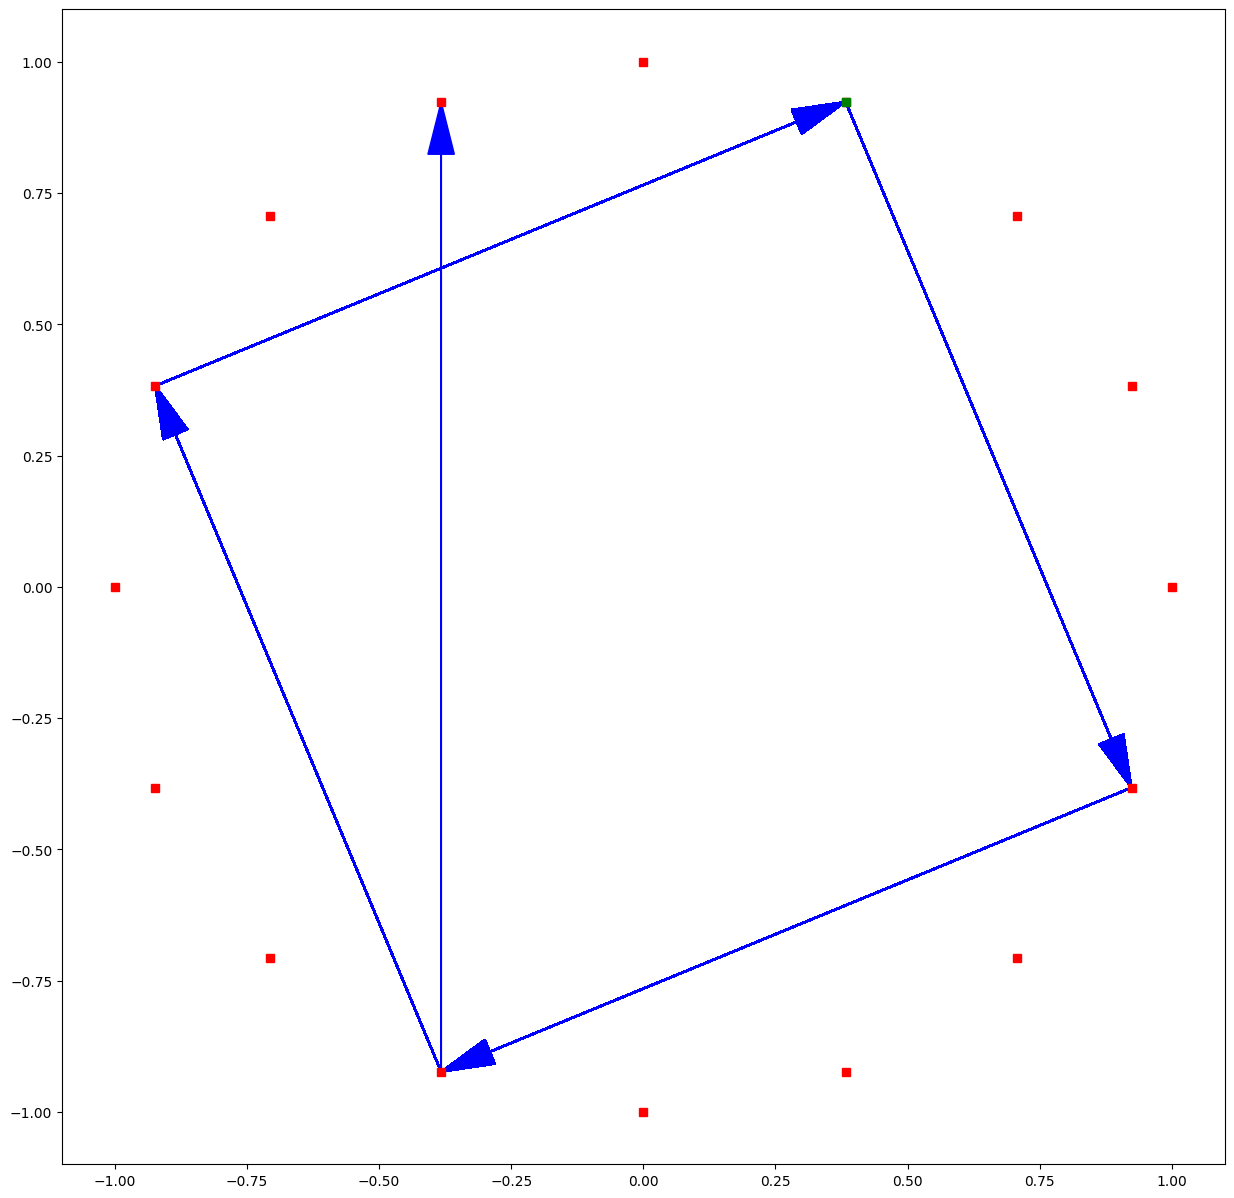

In [7]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
x = np.empty(shape = 1000)
u = np.empty(shape = 1000)
x[0] = 1
for i in range(0,999):
    x[i+1] = x[i]*5 % 16
    u[i] = (x[i] + 1)/(16+1)
fig = plt.figure()
fig.set_size_inches(15,15)
plot_clock_face(16,fig)
plot_clock_path(16,u,fig)

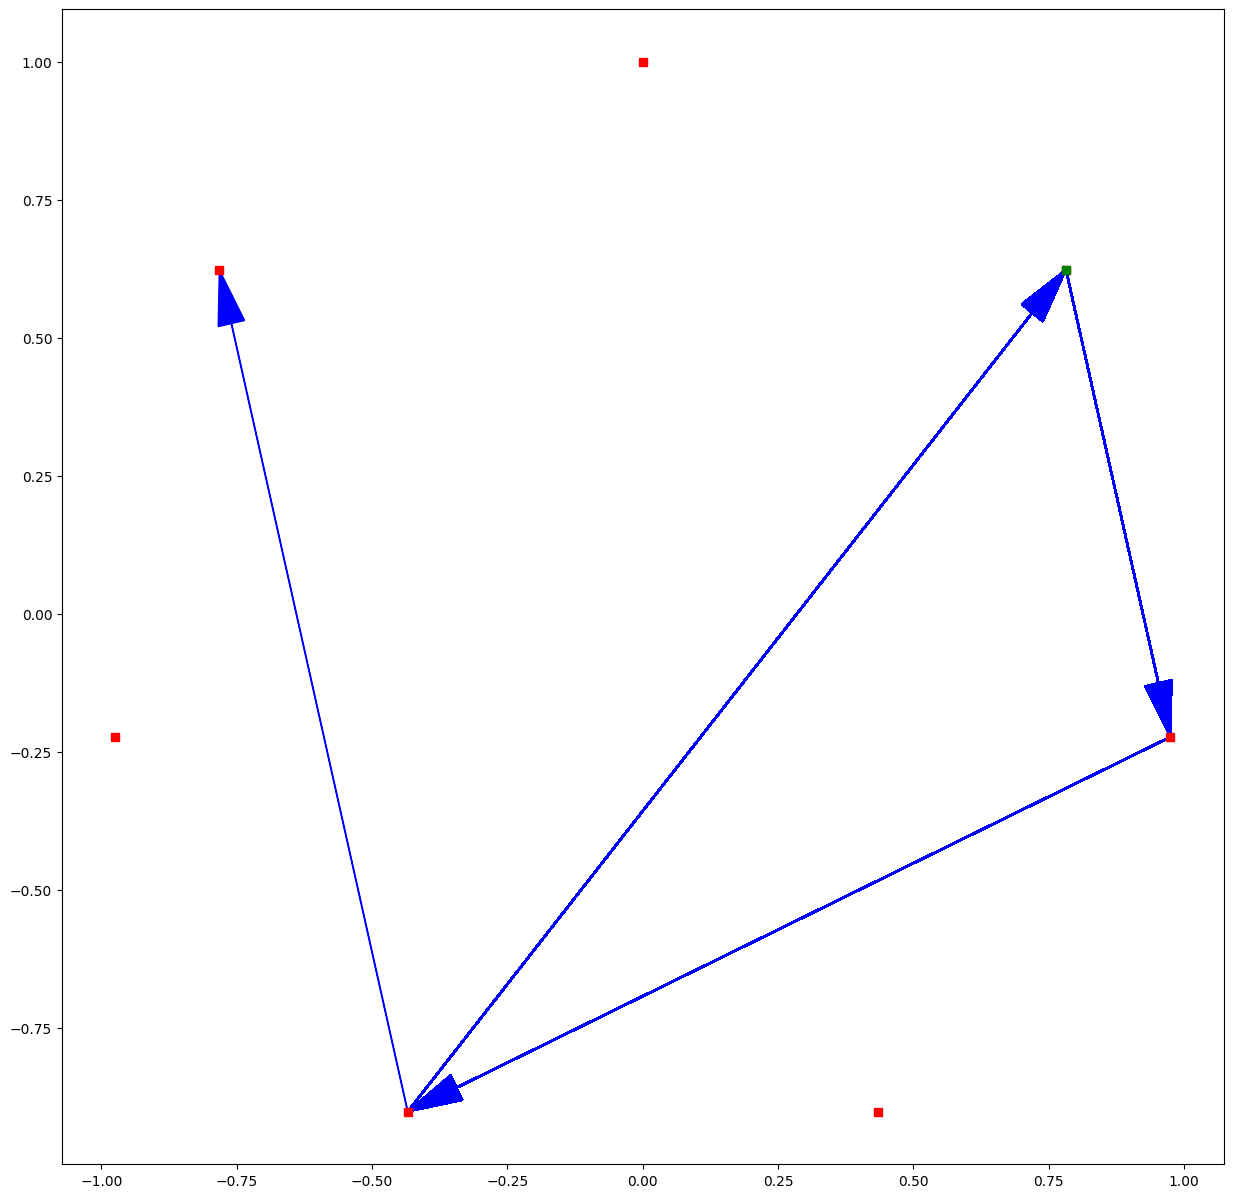

In [8]:
# Ans
y = np.empty(shape = 1000)
u2 = np.empty(shape = 1000)
y[0] = 1
for i in range(0,999):
    y[i+1] = y[i]*2 % 7
    u2[i] = (y[i] + 1)/(7+1)
figs = plt.figure()
figs.set_size_inches(15,15)
plot_clock_face(7,figs)
plot_clock_path(7,u2,figs)

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

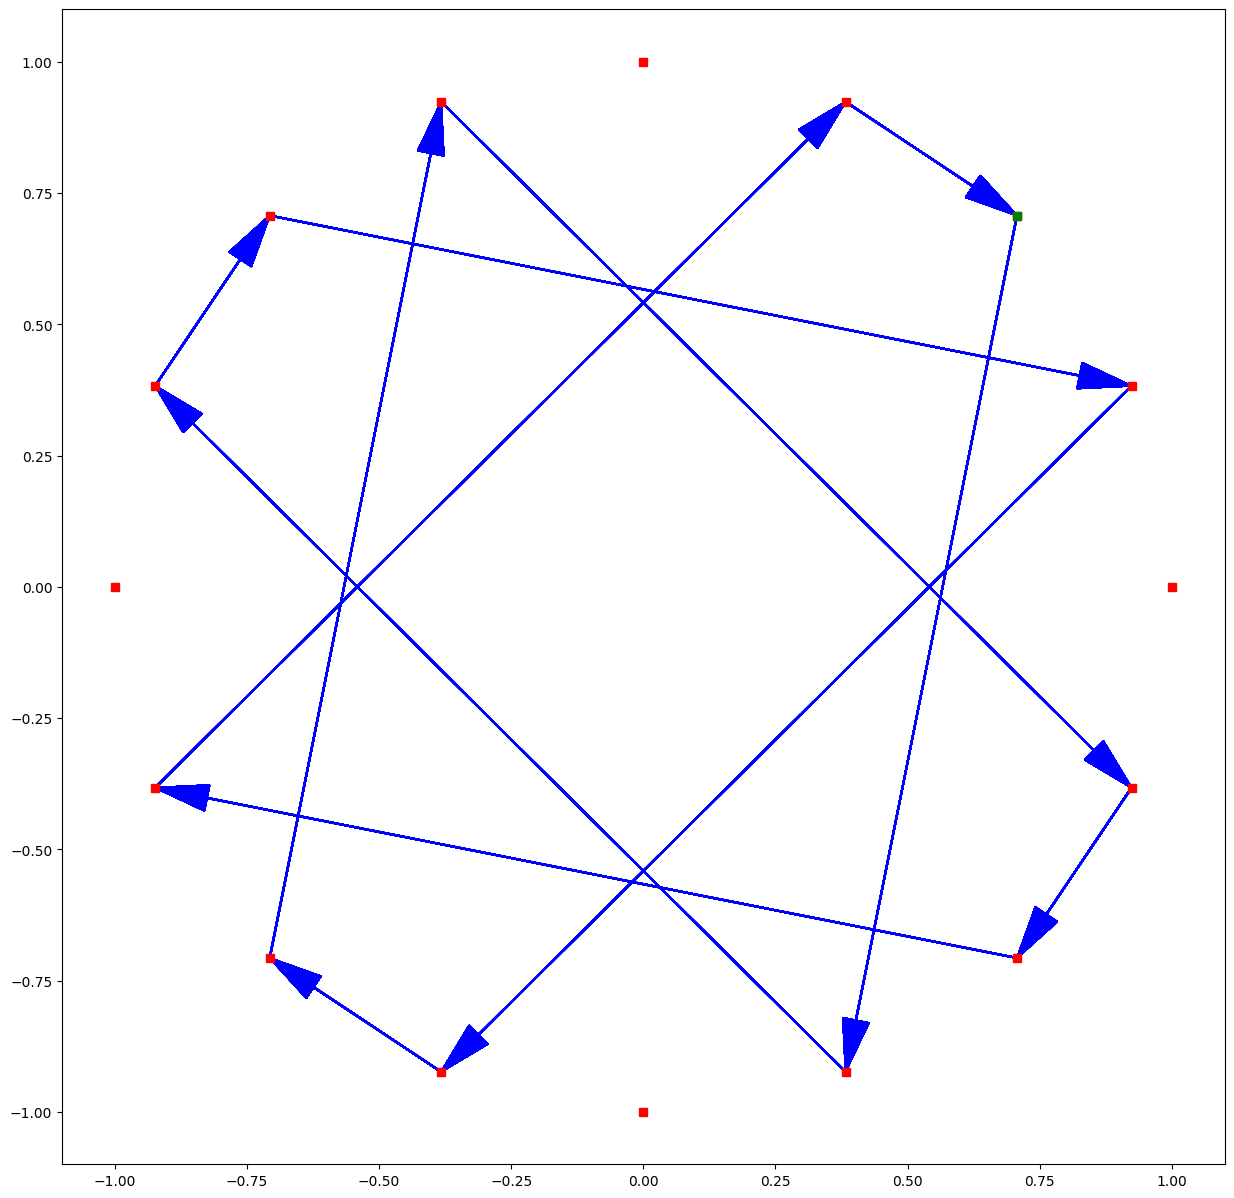

In [9]:
z = np.empty(shape = 1000)
u3 = np.empty(shape = 1000)
for i in range(0,1000):
    z[i] = y[i] + x[i]
    u3[i] = (z[i] + 1)/(16+1)
fig2 = plt.figure()
fig2.set_size_inches(15,15)
plot_clock_face(16,fig2)
plot_clock_path(16,u3,fig2)

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
The period of Xn = 4. The period of Yn = 3. The period of Zn = 12.

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

$F^{-1}(y) = y$,  for $0<= y <= 1/2$

$F^{-1}(y) = 1/2$,  for $1/2<= y <= 1$

$F^{-1}(y) = -∞$ ,  $y < 0$

$F^{-1}(y) = 1$ ,  $y > 1$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

In [ ]:
def geometric_sample(NumSamples, prob):
    samples = []
    for x in range(NumSamples):
        rand = np.random.rand()
        k = scipy.stats.geom.ppf(rand, prob)
        samples.append(k)
    return samples

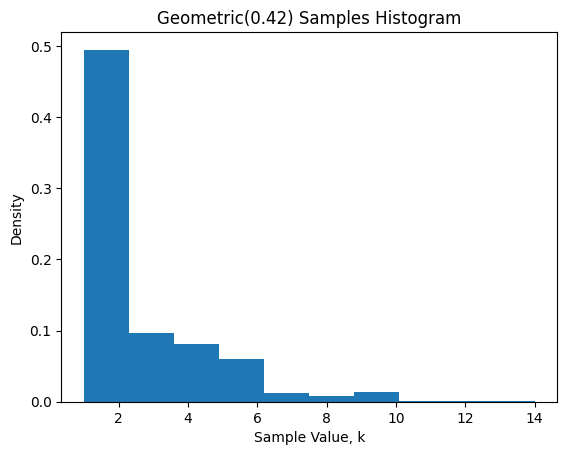

In [ ]:
geo_prob = 0.42
num_samples = 1000

samples = geometric_sample(num_samples, geo_prob)

# Plot the histogram of the generated samples
plt.hist(samples, bins=10, density=True)
plt.title("Geometric(0.42) Samples Histogram")
plt.xlabel("Sample Value, k")
plt.ylabel("Density")
plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.


In [ ]:
def pdf(x):
    if 0 <= x <= 2:
        return np.exp(x - 2)
    elif x > 2:
        return np.exp(-x)
    else:
        return 0

First had to calculate the CDF by integrating the pdf:

$F(x) = e^{x - 2} - e^{-2} $, for $0 ≤ x ≤ 2$

$F(x) = 1 - e^{-x} $, for $x > 2$

$F(x) = 0$ , otherwise

Then took the inverse to get the inverse CDF:

$F^{-1}(x) = ln(x+e^{-2})+2 $ for $0 ≤ x ≤ 1 - (e)^{-2}$

$F^{-1}(x) = -ln(1-x) $ for $x > 1-e^{-2}$

$F^{-1}(x) = e^{x - 2} - e^{-2} $ otherwise

In [ ]:
def inverse_cdf(u):
    if u > 1 - math.exp(-2):
      x = -math.log(1-u)
    else:
      x = math.log(u + math.exp(-2)) + 2
    return x

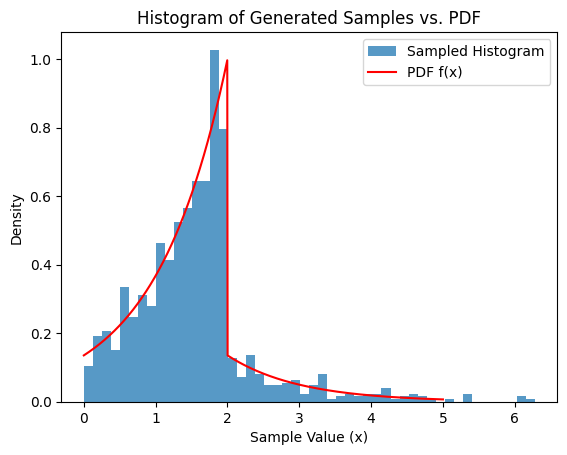

In [ ]:
num_samples = 1000
samples = [inverse_cdf(np.random.rand()) for _ in range(num_samples)]

plt.hist(samples, bins=50, density=True, alpha=0.75, label='Sampled Histogram')
plt.title("Histogram of Generated Samples vs. PDF")
plt.xlabel("Sample Value (x)")
plt.ylabel("Density")

x_values = np.linspace(0, 5, 1000)
pdf_values = [pdf(x) for x in x_values]

plt.plot(x_values, pdf_values, 'r', label='PDF f(x)')
plt.legend()
plt.show()

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


In [2]:
def pdf(x):
    return (5*x**4 + 4*x**3+ 3*x**2 + 1)/4
a = 0 #bounds
b = 1
accept = []
def accept_reject(pdf, a, b, n): #algorithm generated from notes
    i = 0
    while i < n:
        U1 = np.random.uniform(a,b)
        U2 = np.random.uniform(0,1)
        Z1 = U1
        Z2 = (13/4)*U2 #M = 13/4 because the max value the PDF can output is 13/4
        if(Z2 <= pdf(Z1)):
            accept.append(Z1)
        i+= 1
    return accept
sample = accept_reject(pdf,0,1,2500)

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

In [3]:
from scipy import integrate
possible_area = 13/4
area_under_curve, error = integrate.quad(pdf, 0,1) #the integral of the pdf from 0 to 1 is equal to 1
prob_accept = area_under_curve/possible_area
uni_dis_samples = 2/prob_accept #2 is used because two uniform distributions are generated per attempt at acceptance
uni_dis_samples = round(uni_dis_samples,2)
print('Average number of samples from the uniform distribution in order to generate one sample of X: ',uni_dis_samples)

Average number of samples from the uniform distribution in order to generate one sample of X:  6.5


___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


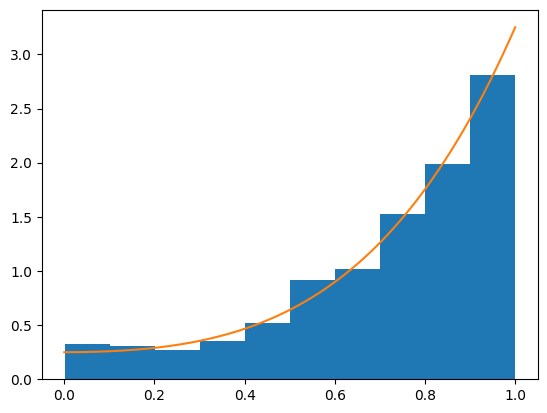

In [4]:
x = np.linspace(0,1,2500)
y = pdf(x)
plt.hist(accept, density = True)
plt.plot(x,y)

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

(Used ChatGPT as a reference on how to get started approaching all of problem 4) (TA told me about the scipy.stats.laplace.ppf function)

Describing the Inversion Algorithm:
1. Compute the CDF of g(x) (found by integrating the PDF)

$ = \begin{cases}
 - \frac{1}{2}e^{-x} + \frac{1}{2}& \text{for }x \geq 0 \\
- \frac{1}{2}e^{x} + \frac{1}{2} & \text{for } x < 0
 \end{cases}$


2. Compute the inverse of the CDF (found by solving x in terms of y)

$ = \begin{cases}
-\ln(1 - 2y) & \text{for } 0 \leq y \leq \frac{1}{2} \\
\ln(2y - 1) & \text{for } \frac{1}{2} < y \leq 1
\end{cases} $

3. Generate a random number from a uniform [0,1] distribution. Plug this sumber into the inverse of the CDF to obtain the random sample we are after.

Implementing the Inversion Algorithm:

In [ ]:
def LaplaceFunction(n):
    u = np.random.uniform(0, 1, n)
    x = scipy.stats.laplace.ppf(u)
    return x

In [ ]:
# Generating 15 Laplace-distributed samples
samples = LaplaceFunction(15)
print(samples)

[ 0.33899758  1.66211439 -0.34420072  1.62266956 -1.46070841  0.21768286
 -0.50619316 -0.11923898 -2.07429978  1.8600072   0.08004666  0.40655669
  0.06098222  0.6864055  -0.11513033]


___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

We need to find where $k * g(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Or in other words where:

$k \geq f(x)*g(x)$

$k \geq (e^{-x^{2}/2}/\sqrt{2\pi}) / (e^{-|x|}/2)$

$k \geq (2/\sqrt{2\pi})*e^{-.5*x^{2}+x} $

Since $e^{f(x)}$ is monitonically increasing, we can do the following.
Take the derivative here and set it equal to zero to find the maximum, which occurs at x=1.

Which results in $ k = \sqrt{2e/\pi} $

ChatGPT helped us get started on the acceptance / rejection algorithm.

In [ ]:
def acceptance_rejection():
    k = math.sqrt((2*math.exp(1))/math.pi)
    while True:
        # Generate a sample from the Laplace proposal distribution g(x)
        sample = np.random.laplace(scale=1/k)

        # Generate a uniform random variable u in [0, 1]
        u = np.random.uniform(0, 1)

        # Accept the sample if u <= f(sample) / (k * g(sample))
        if u <= 1 / (2 * k * np.exp(-abs(sample))):
            return sample

In [ ]:
num_samples = 1000
samples = [acceptance_rejection() for x in range(num_samples)]

# Area under the curve over the whole area, ChatGPT helped me find this area
expected_samples_per_output = 1 / (1 / (2 * np.exp(-1)) * 0.5)
print("Expected number of samples needed per output:", expected_samples_per_output)

Expected number of samples needed per output: 1.4715177646857693



**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

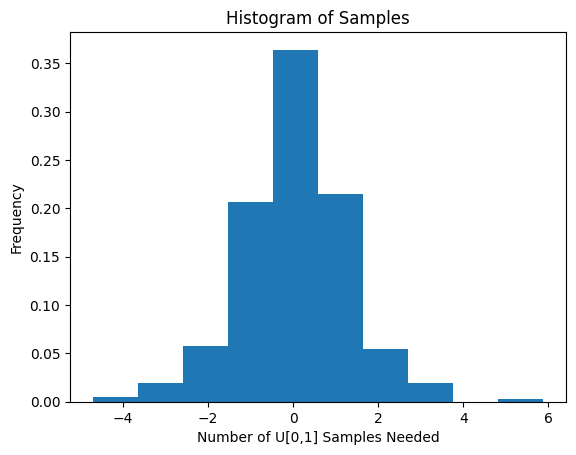

In [ ]:
num_samples = 1000
samples = [acceptance_rejection() for x in range(num_samples)]

plt.hist(samples, bins= 10, density=True)
plt.title("Histogram of Samples")
plt.xlabel("Number of U[0,1] Samples Needed")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Calculating average and 95% CI
average_samples = np.mean(samples)
confidence_interval = np.percentile(samples, [2.5, 97.5])

print("Average Number of Samples Needed:", average_samples)
print("95% CI:", confidence_interval)

Average Number of Samples Needed: 1.9664920681654
95% CI: [0.06238179 7.07182808]


___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

In [ ]:
def cauchy_sample(n):
    u = np.random.uniform(0, 1, n)
    x = scipy.stats.cauchy.ppf(u)
    return x

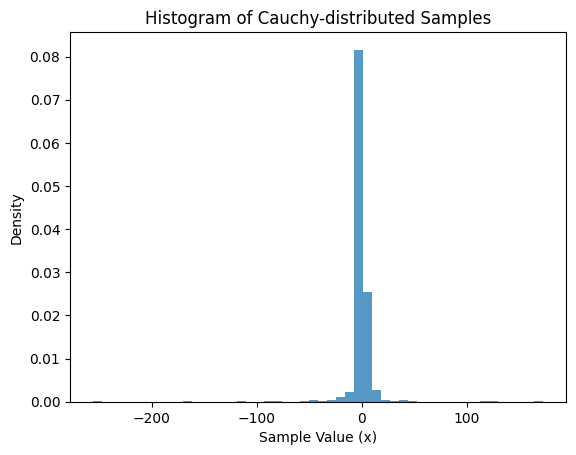

In [ ]:
num_samples = 1000
samples = cauchy_sample(num_samples)

# Plot the histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.75)
plt.title("Histogram of Cauchy-distributed Samples")
plt.xlabel("Sample Value (x)")
plt.ylabel("Density")
plt.show()

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.

(b)

In [ ]:
def acceptance_rejection_cauchy():
    k = 1 / np.pi  # Smallest k such that k * g(x) >= f(x) for 0 <= x <= 1
    num_samples = 0

    while True:
        # Generate a sample from the Cauchy proposal distribution g(x)
        sample_g = np.tan(np.pi * (np.random.rand() - 0.5))

        # Generate a uniform random variable u in [0, 1]
        u = np.random.uniform(0, 1)

        # Accept the sample if u <= f(sample_g) / (k * g(sample_g))
        if u <= 1 / (np.pi * (1 + sample_g ** 2)):
            return sample_g


In [ ]:
# Example usage:
num_samples = 1000
samples = [acceptance_rejection_cauchy() for _ in range(num_samples)]

# Compute the expected number of samples needed to generate each sample
expected_samples_per_output = np.pi
print("Expected number of samples needed per output:", expected_samples_per_output)


Expected number of samples needed per output: 3.141592653589793


(c)

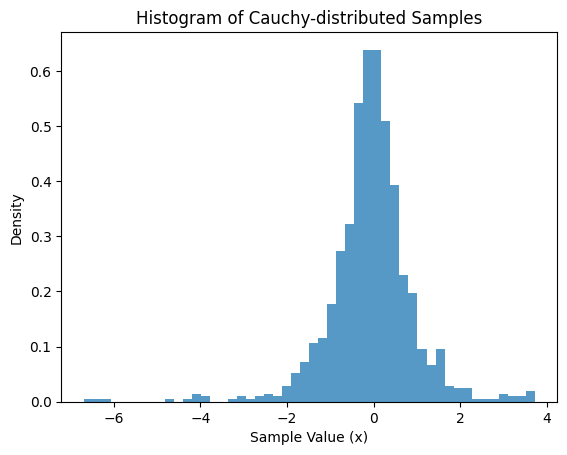

In [ ]:
def acceptance_rejection_cauchy():
    k = 1 / np.pi  # Smallest k such that k * g(x) >= f(x) for 0 <= x <= 1
    num_samples = 0

    while True:
        # Generate a sample from the Cauchy proposal distribution g(x)
        sample_g = np.tan(np.pi * (np.random.rand() - 0.5))

        # Generate a uniform random variable u in [0, 1]
        u = np.random.uniform(0, 1)

        # Accept the sample if u <= f(sample_g) / (k * g(sample_g))
        if u <= 1 / (np.pi * (1 + sample_g ** 2)):
            return sample_g, num_samples

        num_samples += 1

# Generate 1000 samples
num_samples = 1000
samples = []
num_samples_needed = []

for _ in range(num_samples):
    sample, num_samples_required = acceptance_rejection_cauchy()
    samples.append(sample)
    num_samples_needed.append(num_samples_required)

# Plot the histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.75)
plt.title("Histogram of Cauchy-distributed Samples")
plt.xlabel("Sample Value (x)")
plt.ylabel("Density")
plt.show()


In [ ]:
# Calculate the average and 95% confidence interval for the number of U[0,1] samples needed
average_samples_needed = np.mean(num_samples_needed)
confidence_interval = np.percentile(num_samples_needed, [2.5, 97.5])

print("Average Number of Samples Needed:", average_samples_needed)
print("95% CI:", confidence_interval)

Average Number of Samples Needed: 5.459
95% CI: [ 0. 21.]
